In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_excel('/content/AI_ML_Dataset.xlsx')

# 2. Basic preprocessing
# Only keep 'Average CO2' and 'temp'
df = df[['average_CO2', 'temp']]

In [25]:

# Exploration of the data
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nChecking for missing values:")
print(df.isnull().sum())


First 5 rows of the dataset:
   average_CO2  temp
0       315.98  0.22
1       316.91 -0.24
2       317.64  0.12
3       318.45  0.16
4       318.99 -0.10

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   average_CO2  66 non-null     float64
 1   temp         66 non-null     float64
dtypes: float64(2)
memory usage: 1.2 KB
None

Summary Statistics:
       average_CO2       temp
count    66.000000  66.000000
mean    360.249545   0.453636
std      32.106239   0.389353
min     315.980000  -0.240000
25%     331.355000   0.162500
50%     356.120000   0.400000
75%     385.377500   0.677500
max     424.610000   1.340000

Checking for missing values:
average_CO2    0
temp           0
dtype: int64


In [26]:
# Drop rows with missing values (if any)
df = df.dropna()

In [27]:
#  Prepare features (X) and target (y)
X = df[['average_CO2']].values  # Features should be 2D
y = df['temp'].values.reshape(-1, 1)  # Target also 2D

# Normalize X
X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std

#  Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Regression Equation: temp = 0.3661 * (Normalized Average CO2) + 0.4587
Mean Squared Error on Test Set: 0.0209


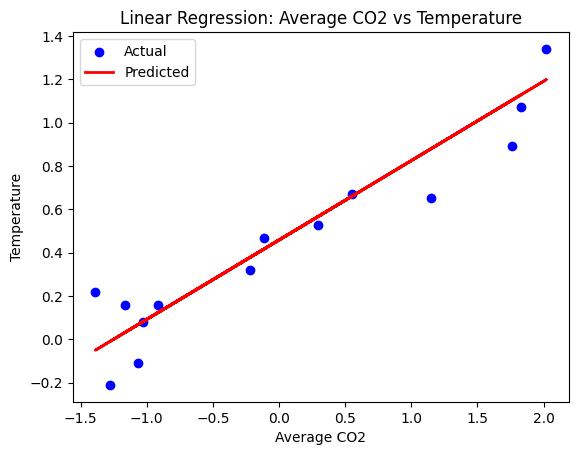

In [28]:
# Simple Linear Regression Model

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            error = y_predicted - y

            # Gradients
            dw = (1/n_samples) * np.dot(X.T, error)
            db = (1/n_samples) * np.sum(error)

            # Update weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

#  Train the model
model = LinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train, y_train)

#  Make predictions
y_pred_linear = model.predict(X_test)

# Evaluate the model
def mean_squared_error(y_true, y_pred_linear):
    return np.mean((y_true - y_pred_linear)**2)
weight = model.weights[0][0]
bias = model.bias
print(f"Regression Equation: temp = {weight:.4f} * (Normalized Average CO2) + {bias:.4f}")

mse = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error on Test Set: {mse:.4f}")

#  Plotting
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Predicted')
plt.xlabel('Average CO2')
plt.ylabel('Temperature')
plt.title('Linear Regression: Average CO2 vs Temperature')
plt.legend()
plt.show()


Mean Squared Error (SVR): 0.0236
R² Score (SVR): 0.8722


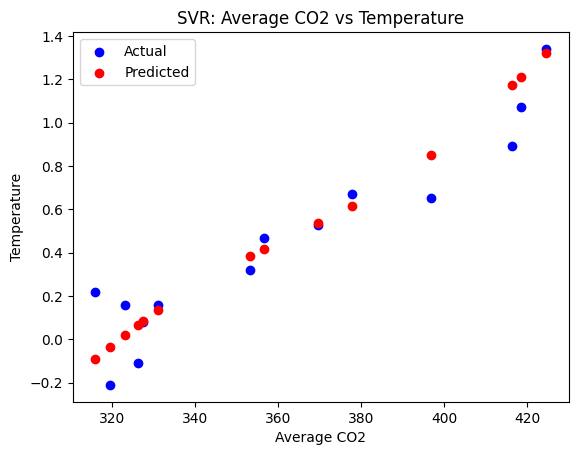

In [30]:
# Support Vector Regression (SVR)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



#  Keep only 'Average CO2' and 'temp'
df = df[['average_CO2', 'temp']]
df = df.dropna()

#  Prepare features and target
X = df[['average_CO2']].values  # 2D array
y = df['temp'].values  # 1D array

#  Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Feature Scaling (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()  # flatten after scaling

#  Train SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

#  Predict
y_pred_scaled = svr_model.predict(X_test_scaled)

# Inverse transform the predictions
y_pred_svr = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

#  Evaluation
mse = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print(f"Mean Squared Error (SVR): {mse:.4f}")
print(f"R² Score (SVR): {r2:.4f}")

#  Plot Actual vs Predicted
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_svr, color='red', label='Predicted')
plt.xlabel('Average CO2')
plt.ylabel('Temperature')
plt.title('SVR: Average CO2 vs Temperature')
plt.legend()
plt.show()


Polynomial Degree: 3
Mean Squared Error (Polynomial Regression): 0.0245
R² Score (Polynomial Regression): 0.8675


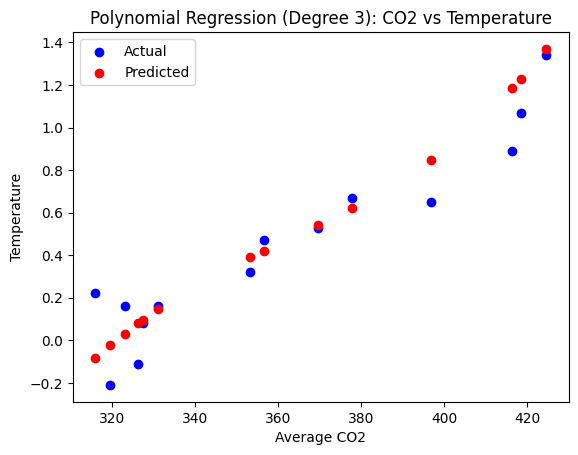

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


#  Keep only 'Average CO2' and 'temp'
df = df[['average_CO2', 'temp']]
df = df.dropna()

#  Prepare features and target
X = df[['average_CO2']].values
y = df['temp'].values

#  Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Create polynomial features
degree = 3  # Degree of the polynomial (you can change to 2, 3, 4, etc.)
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#  Train Linear Regression on Polynomial Features
model = LinearRegression()
model.fit(X_train_poly, y_train)

#  Predict
y_pred_poly = model.predict(X_test_poly)

#  Evaluation
mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print(f"Polynomial Degree: {degree}")
print(f"Mean Squared Error (Polynomial Regression): {mse:.4f}")
print(f"R² Score (Polynomial Regression): {r2:.4f}")

#  Plot Actual vs Predicted
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_poly, color='red', label='Predicted')
plt.xlabel('Average CO2')
plt.ylabel('Temperature')
plt.title(f'Polynomial Regression (Degree {degree}): CO2 vs Temperature')
plt.legend()
plt.show()


In [32]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# For each model, you already have:
# y_test (true values)
# y_pred_linear (predictions from your from-scratch model)
# y_pred_svr (predictions from SVR)
# y_pred_poly (predictions from Polynomial Regression)

# Example assuming y_pred_linear, y_pred_svr, y_pred_poly are available

# 1. Linear Regression (from scratch)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# 2. SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# 3. Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Display results
print("\nModel Comparison:")
print(f"{'Model':<25} {'MSE':<10} {'RMSE':<10} {'R² Score':<10}")
print("-"*55)
print(f"{'Linear Regression':<25} {mse_linear:.4f} {rmse_linear:.4f} {r2_linear:.4f}")
print(f"{'SVR':<25} {mse_svr:.4f} {rmse_svr:.4f} {r2_svr:.4f}")
print(f"{'Polynomial Regression':<25} {mse_poly:.4f} {rmse_poly:.4f} {r2_poly:.4f}")



Model Comparison:
Model                     MSE        RMSE       R² Score  
-------------------------------------------------------
Linear Regression         0.0209 0.1446 0.8870
SVR                       0.0236 0.1537 0.8722
Polynomial Regression     0.0245 0.1565 0.8675
